# Computer Exercise #02 - The Perceptron Learning Algorithm ##

Included below is the core code for this computer exercise.  You will need set the parameters of the classes according to what you would like to do.  If you accept the default parameters, make sure you understand what they are, and make sure you understand what parameters may be set.

For repeatable experiments, you may want to consider setting the random number seed when generating datasets.



## The Perceptron Algorithm

Here is a simple percepton learning algorithm that you may modify to perform the pocket algorithm.

In [1]:
def perceptron_sgd(X, y):
    w = np.zeros(len(X[0]))
    eta = 1
    epochs = 20
    for t in range(epochs):
        for i, x in enumerate(X):
            if (np.dot(X[i], w)*y[i]) <= 0:
                w = w + eta*X[i]*y[i]
                return w

## Common Imports ###

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split

## Data Sets

### Data Set #1

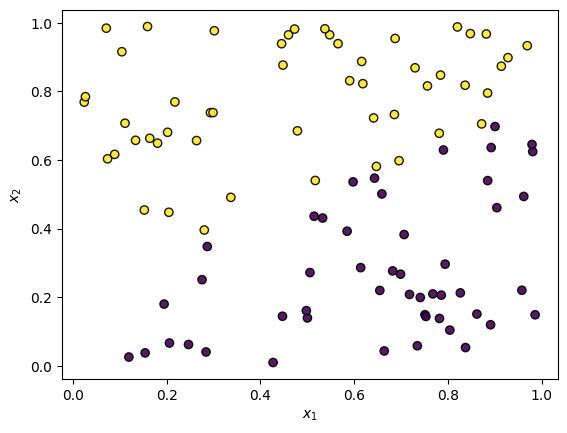

In [3]:
X1 = np.random.rand(100,2)
y1 = (-0.5*X1[:,0] + X1[:,1] -0.25 > 0).astype(int)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.scatter(X1[:, 0], X1[:, 1], c=y1, alpha=0.9, edgecolors='black')

### Data Set #2
Shown along with a scatter plot is the decision boundary.

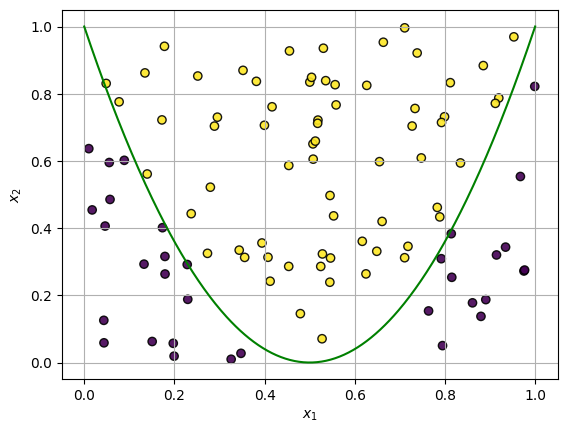

In [4]:
X2 = np.random.rand(100,2)
y2 = (X2[:,1] > 4*(X2[:,0]-0.5)**2).astype(int)
plt.scatter(X2[:, 0], X2[:, 1], c=y2, alpha=0.9, edgecolors='black')
#Plot decision boundary
x1 = np.linspace(0, 1, 400)
x2 = 4 * (x1 - 0.5) ** 2
plt.plot(x1, x2, color='green')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.grid(True)

### Data Set #3

Text(0, 0.5, '$x_2$')

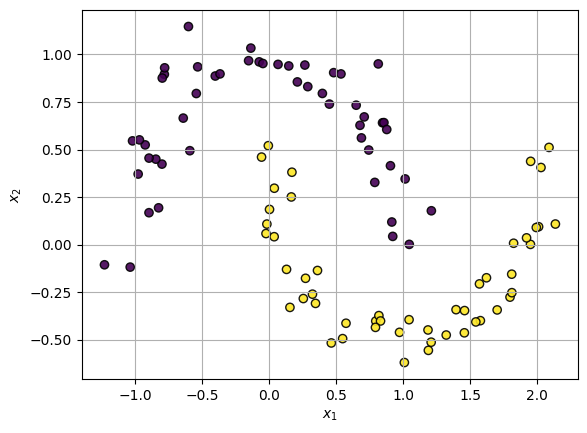

In [5]:
from sklearn.datasets import make_moons
X3,y3 = make_moons(n_samples=100, shuffle=True, noise=0.1)
plt.scatter(X3[:, 0], X3[:, 1], c=y3, alpha=0.9, edgecolors='black')
plt.grid(True)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')

### Data Set #4

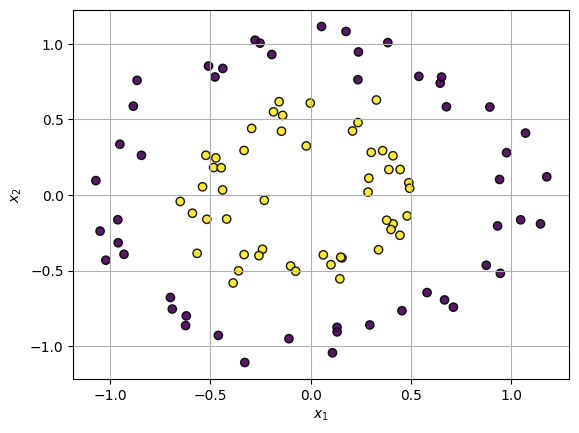

In [6]:
from sklearn.datasets import make_circles
X4,y4 = make_circles(n_samples=100, shuffle=True, noise=0.1,factor=0.5)
plt.scatter(X4[:, 0], X4[:, 1], c=y4, alpha=0.9, edgecolors='black')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.grid(True)

# Training and Test Sets

You may want to put in your own value for `test_size` instead of accepting the default value.

### Important Note ###
In the `train_test_splot` class you will need to put in the desired dataset, e.g. `(X1,y1)` or `(X2,y2)` in the place of `(X,y)`, or redefine `(X,y)`. 

In [7]:
# Here we are using dataset #1
X=X1
y=y1    

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y)  

## PLA ###

In [9]:
from sklearn.linear_model import Perceptron
clf = Perceptron()  #Note:  You may not want to use the default values
clf.fit(X_train,y_train)

Perceptron()

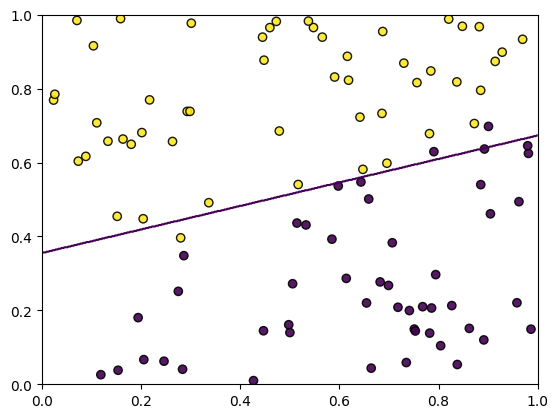

In [10]:
xx, yy = np.meshgrid(np.linspace(0, 1, 500), np.linspace(0, 1, 500))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, levels=[0])
plt.scatter(X[:, 0], X[:, 1], alpha=0.9, c=y, edgecolors='black')

# Nonlinear PLA

## Augmenting a Feature Vector

Here is an example of adding polynomial features, $x_1^2$, $x_1x_2$, and $x_2^2$ to the feature vector **x** to create a feature vector of length 5 plus the bias.  For a higher-order polynomial, change the value of `degree`.
### Note:  ###
The dataset used here is the one saved in `(X_train,y_train)`.
Change as appropriate.

In [11]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=True)
X_train_aug = poly.fit_transform(X_train)
X_test_aug = poly.fit_transform(X_test)

### PLA

Be familiar with the parameters and their default values.

In [12]:
clf=Perceptron()
clf.fit(X_train_aug, y_train)

Perceptron()

### Potting the Decision Surface and Dataset

In [13]:
# Define the mesh grid for the original 2D space
x_min, x_max = X_train_aug[:, 1].min(), X_train_aug[:, 1].max()
y_min, y_max = X_train_aug[:, 2].min(), X_train_aug[:, 2].max()
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.001),
                     np.arange(y_min, y_max, 0.001))
# Project the mesh grid into the augmented feature space
Z = poly.transform(np.c_[xx.ravel(), yy.ravel()])
Z = clf.predict(Z)
Z = Z.reshape(xx.shape)

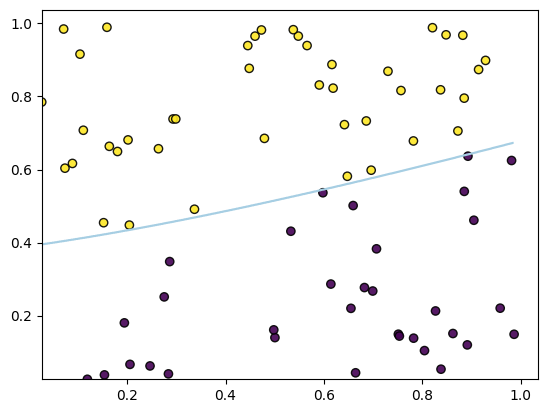

In [14]:
# Plot the decision boundary and the original data points
plt.contour(xx, yy, Z, levels=[0], alpha=1, cmap=plt.cm.Paired)
plt.scatter(X_train[:, 0], X_train[:, 1], alpha=0.9, c=y_train, edgecolors='black')
plt.show()

### Shoelace Theorem

In [15]:
def shoelace_area(x1, y1, x2, y2, x3, y3):
    # Calculate the area using the Shoelace formula
    area = abs(x1 * y2 + x2 * y3 + x3 * y1 - (y1 * x2 + y2 * x3 + y3 * x1)) / 2
    return area